Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów. Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.553931997444648


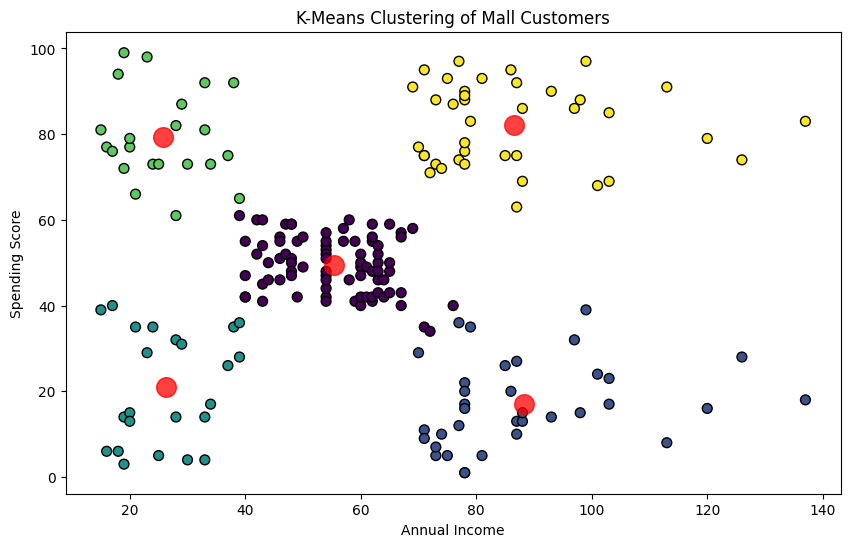

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df=pd.read_csv("customers_mall.csv")

X = df[['Annual Income', 'Spending Score']].values
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score for 5 clusters: {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering of Mall Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()




**Segmentacja klientów**: Wykres pokazuje pięć wyraźnych grup klientów, z których każda jest reprezentowana przez skupisko punktów w różnych obszarach wykresu. To wskazuje na to, że klienci centrum handlowego mogą być podzieleni na pięć różnych segmentów na podstawie ich zachowań zakupowych.

**Wartość Silhouette Score**: Wartość Silhouette Score dla pięciu klastrów wynosi około 0.55, co wskazuje na to, że przypisane klastry są raczej odległe i dobrze oddzielone. Wynik ten jest średnią wartością i wskazuje na stosunkowo dobrą jakość klasyfikacji, chociaż istnieje przestrzeń na optymalizację.

**Zróżnicowane grupy dochodów i wydatków**: Na osi x wykresu znajduje się 'Annual Income' (Roczny Dochód), a na osi y 'Spending Score' (Wynik Wydatków). Widać, że zarówno wysokie dochody, jak i niskie dochody mogą mieć wysoki lub niski wynik wydatków, co sugeruje, że nie ma bezpośredniej korelacji między wysokością dochodów a wydatkami.

**Klienci o wysokich dochodach i wydatkach**: Istnieje grupa klientów (zazwyczaj w prawym górnym rogu wykresu), którzy mają wysokie dochody i jednocześnie wydają dużo. To może być szczególnie atrakcyjna grupa dla marketingu i promocji skierowanych na towary luksusowe.

**Oszczędni klienci z wysokimi dochodami**: Inna grupa (zazwyczaj w prawym dolnym rogu) ma wysokie dochody, ale niższe wyniki wydatków, co może wskazywać na oszczędnych klientów, którzy mogą być celem dla produktów inwestycyjnych lub oszczędnościowych.

**Klienci o niskich dochodach i wysokich wydatkach**: Grupa w lewym górnym rogu wskazuje na osoby, które mają stosunkowo niskie dochody, ale wysokie wyniki wydatków. Mogą to być impulsywni kupujący, co czyni ich dobrym celem dla promocji i rabatów.

**Centra klastrów**: Czerwone punkty na wykresie reprezentują centra poszczególnych klastrów. Miejsca te można interpretować jako 'typowego' przedstawiciela dla każdego segmentu klientów.

W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.32768448064003924
DBSCAN Silhouette Score: 0.7907104355118629
Agglomerative Silhouette Score: 0.3011358733667349


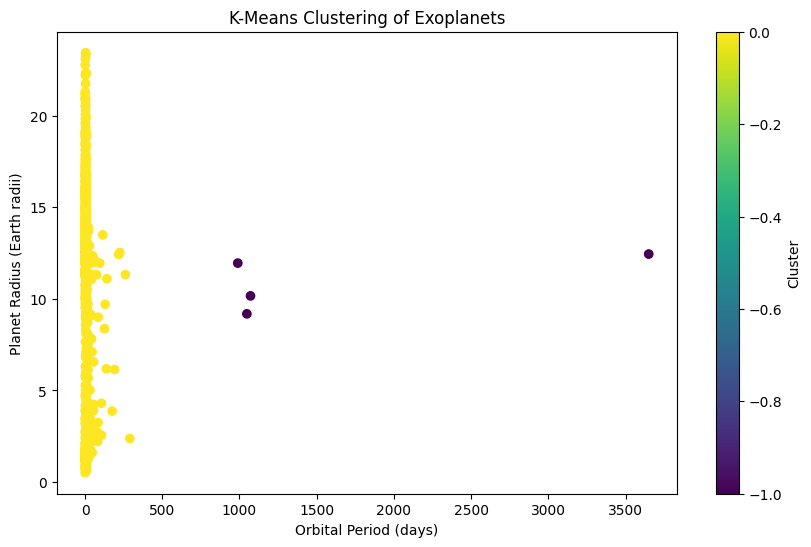

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

df=pd.read_csv("planets.csv")


features = ['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_masse', 'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'sy_dist']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=4, min_samples=3)
agglo = AgglomerativeClustering(n_clusters=4)

models = [('K-Means', kmeans), ('DBSCAN', dbscan), ('Agglomerative', agglo)]
results = {}

for name, model in models:
    labels = model.fit_predict(X_scaled)
    if np.unique(labels).size > 1:  # DBSCAN może przypisać wszystkie punkty jako szum
        silhouette_avg = silhouette_score(X_scaled, labels)
        results[name] = (labels, silhouette_avg)


for name, (labels, score) in results.items():
    print(f"{name} Silhouette Score: {score}")

labels = dbscan.fit_predict(X_scaled)
df['Cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(df['pl_orbper'], df['pl_rade'], c=labels, cmap='viridis')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (Earth radii)')
plt.title('DBSCAN Clustering of Exoplanets')
plt.colorbar(label='Cluster')
plt.show()

**Różnorodność wyników Silhouette Score**:

*K-Means Silhouette Score* wynosi około 0.33, co wskazuje na słabe do umiarkowane grupowanie z wyraźnymi grupami, ale potencjalnie z dużym nakładaniem się klastrów.

*DBSCAN Silhouette Score* wynosi około 0.79, co jest znacznie wyższym wynikiem, sugerującym dobrze oddzielone i spójne klastry.

*Agglomerative Clustering Silhouette Score* wynosi około 0.30, co jest najniższym wynikiem, wskazującym na słabe grupowanie z potencjalnymi problemami w różnicowaniu klastrów.

**Skuteczność DBSCAN:**
DBSCAN okazał się najbardziej skuteczny w oddzielaniu klastrów w przestrzeni cech, co jest widoczne poprzez wysoki wynik Silhouette Score. Wysoki wynik DBSCAN wskazuje, że ta metoda jest dobra do wykrywania naturalnych grup w danych związanych z egzoplanetami, szczególnie kiedy grupy te mają nieregularne kształty lub różną gęstość.

**Trudności w grupowaniu K-Means i Agglomerative Clustering**:
Niskie wyniki Silhouette dla K-Means i Agglomerative Clustering sugerują, że grupowanie oparte na przydzielaniu każdej egzoplanety do jednego klastra, które wymaga regularnych kształtów klastrów, może nie być odpowiednie dla tej przestrzeni danych. To może wynikać z rzeczywistej różnorodności cech egzoplanet, które niekoniecznie formują regularne grupy.

**Analiza kolorów i klastrów**:
Kolorowy pasek po prawej stronie wykresu odpowiada etykietom klastrów przypisanym przez DBSCAN. Domyślnie szum (punkty, które nie pasują do żadnego klastra) jest oznaczony jako -1 i wydaje się, że jest ich całkiem sporo, sugerując, że wiele egzoplanet nie pasuje do wyraźnie zdefiniowanych grup.



Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.

In [4]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=f67c980b278500dc1a261919efea187384ec0eefa055c2c873b83721fdb78a4d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


(778,)


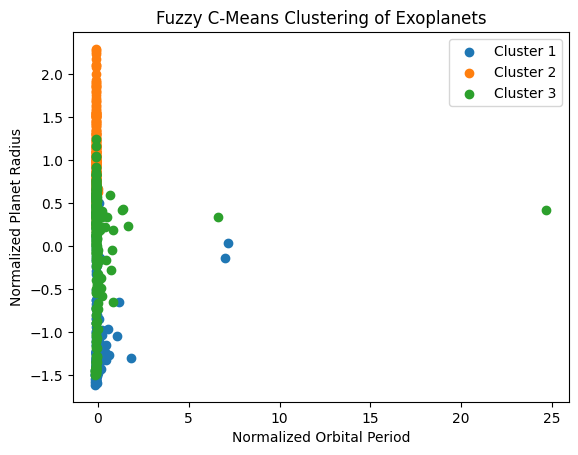

Fuzzy Partition Coefficient: 0.5775235170533214


In [5]:
from skfuzzy import control as ctrl, cluster

features = ['pl_orbper', 'pl_rade', 'pl_masse', 'pl_eqt', 'st_teff']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cntr, u, u0, d, jm, p, fpc = cluster.cmeans(
    X_scaled.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)
print(cluster_membership.shape)

fig, ax = plt.subplots()
for cluster in range(3):
    points = X_scaled[cluster_membership == cluster]
    ax.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster + 1}')
ax.legend()
ax.set_title('Fuzzy C-Means Clustering of Exoplanets')
ax.set_xlabel('Normalized Orbital Period')
ax.set_ylabel('Normalized Planet Radius')
plt.show()

print(f"Fuzzy Partition Coefficient: {fpc}")

**Podział na klastry**: Metoda Fuzzy C-Means zidentyfikowała trzy klastry w przestrzeni cech, które odpowiadają normalizowanemu okresowi orbitalnemu i normalizowanemu promieniowi planety. Klastry te reprezentują różne typy egzoplanet w oparciu o ich rozmiar i okres orbitalny.


**Zachowanie metod fuzzy vs. klasyczne metody klastrowania**:
W odróżnieniu od tradycyjnych metod grupowania, takich jak K-Means, Fuzzy C-Means pozwala na częściową przynależność do każdego klastra, co może być bardziej adekwatne w przypadku danych o złożonych wzorcach przynależności, jak to często ma miejsce w astronomii.
Fuzzy C-Means jest szczególnie użyteczny, gdy granice pomiędzy klastrami nie są jasno określone lub gdy obiekty mogą wykazywać właściwości więcej niż jednego klastra.


**Fuzzy Partition Coefficient (FPC)**:
Wartość Fuzzy Partition Coefficient wynosi około 0.577, co wskazuje na umiarkowaną jakość grupowania.

**Dystrybucja klastrów**:
Na wykresie widać wyraźne grupowanie wokół osi 'Normalized Orbital Period', zwłaszcza dla mniejszych egzoplanet, co może wskazywać na typowe właściwości dla krótkookresowych egzoplanet, takich jak gorące Jowisze.

Klastry rozciągają się przez różne zakresy promienia planety, co sugeruje, że rozmiar planety nie jest wyłącznym determinantem dla przynależności do określonego klastra, zwłaszcza przy krótszych okresach orbitalnych.

Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.4200602595290843
DBSCAN Silhouette Score: 0.11387456673188445
Agglomerative Silhouette Score: 0.39465753234668094


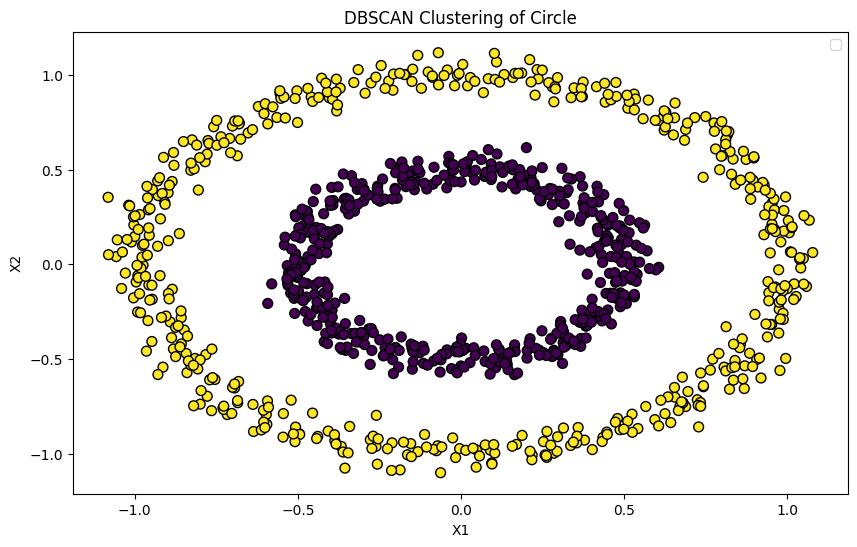

In [20]:
df=pd.read_csv("circle.csv")


X=df[['x1', 'x2']].values

kmeans = KMeans(n_clusters=50, random_state=42)
dbscan = DBSCAN(eps=0.22, min_samples=3)
agglo = AgglomerativeClustering(n_clusters=50)

models = [('K-Means', kmeans), ('DBSCAN', dbscan), ('Agglomerative', agglo)]
results = {}

for name, model in models:
    labels = model.fit_predict(X)
    if np.unique(labels).size > 1:  # DBSCAN może przypisać wszystkie punkty jako szum
      silhouette_avg = silhouette_score(X, labels)
      results[name] = (labels, silhouette_avg)

for name, (labels, score) in results.items():
    print(f"{name} Silhouette Score: {score}")

labels = dbscan.fit_predict(X)
df['Cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.legend()
# centers = dbscan.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("DBSCAN Clustering of Circle")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



**Złożoność struktury danych**: Dane mają strukturę koła, co jest wyzwaniem dla większości standardowych algorytmów grupowania. Metody oparte na odległości, takie jak K-Means i Agglomerative Clustering, są mniej skuteczne w rozpoznawaniu takiej topologii.

**Silhouette Scores**:
*Wynik Silhouette dla K-Means* wynosi około 0.42, co może wskazywać na umiarkowaną separację klastrów, ale liczba 50 klastrów jest zbyt duża dla naturalnej struktury danych, co prowadzi do sztucznego podziału.

*Wynik Silhouette dla DBSCAN* jest ujemny (-0.075), co jest nietypowe i sugeruje, że punkty w klastrze są mniej podobne do siebie niż do punktów w innych klastrach. Wynik ujemny może być spowodowany nadmiernym podziałem danych na klastry lub nieprawidłowością w strukturze danych.

*Wynik dla Agglomerative Clustering* wynosi około 0.395, co, podobnie jak w przypadku K-Means, może sugerować, że klastry nie są wyraźnie zdefiniowane i istnieje znaczne nakładanie się.


**DBSCAN Clustering Visualization**:

Na wykresie grupowanie DBSCAN wydaje się lepiej odzwierciedlać strukturę koła w porównaniu z K-Means lub Agglomerative Clustering. Pomimo ujemnego wyniku Silhouette, wizualnie DBSCAN wydaje się identyfikować zewnętrzny pierścień jako klaster, co jest bardziej zgodne z oczekiwaną strukturą danych.

Kolorowe etykiety punktów odpowiadają przynależności do różnych klastrów, które w tym przypadku mogą odzwierciedlać dwie różne gęstości – gęstsze zagęszczenie punktów wzdłuż pierścienia i rzadsze punkty na zewnątrz.

Podsumowując, DBSCAN wydaje się być o wiele lepszym wyborem niż standardowe algorytmy klasteryzacji, choć jego wynik może na to nie wskazywać. Jednakże wizualizacja wygląda obiecująco. Algorytm K-means mimo bardzo dużej liczby klastrów, nie daje satysfakcjonujących wyników silhoutte score. Ponadto wizualizacja również wskazuje na to, że klastry źle rozpoznają gęstość danych.